# MetroBike Time Series Analysis

## Contents
### Prepare data for time series analysis
### Decomposition
### Test for stationarity
### Stationarize data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
# import cleaned bike data
bikes = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Short Trips Merge.csv')

In [3]:
bikes.head()

,Unnamed: 0.1,Unnamed: 0,Trip ID,Membership or Pass Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,...,Trip Duration Minutes,Month,Year,Return Kiosk ID,Return Kiosk,Return Kiosk Status,Return Location,Return City Asset Number,Return Number of Docks,Return Council District
0,0,0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,2496,...,3,12,2017,2495,4th & Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
1,1,1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,2495,...,14,3,2015,2495,4th/Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
2,2,2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,2712,...,22,10,2014,2575,Riverside/South Lamar,active,"(30.26446, -97.75665)",16736.0,15.0,5.0
3,3,3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,2552,...,29,10,2014,2496,8th/Congress,active,"(30.2698, -97.74186)",16725.0,14.0,9.0
4,4,4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,2498,...,10,3,2015,2549,South 1st/Riverside @ Long Center,active,"(30.25941, -97.74971)",16750.0,13.0,9.0


In [4]:
bikes.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Trip ID', 'Membership or Pass Type',
       'Bicycle ID', 'Bike Type', 'Checkout Datetime', 'Checkout Date',
       'Checkout Time', 'Checkout Kiosk ID', 'Checkout Kiosk',
       'Checkout Kiosk Status', 'Checkout Location',
       'Checkout City Asset Number', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',
       'Return Kiosk ID', 'Return Kiosk', 'Return Kiosk Status',
       'Return Location', 'Return City Asset Number', 'Return Number of Docks',
       'Return Council District'],
      dtype='object')

In [5]:
bikes.dtypes

Unnamed: 0.1                    int64
Unnamed: 0                      int64
Trip ID                         int64
Membership or Pass Type        object
Bicycle ID                     object
Bike Type                      object
Checkout Datetime              object
Checkout Date                  object
Checkout Time                  object
Checkout Kiosk ID               int64
Checkout Kiosk                 object
Checkout Kiosk Status          object
Checkout Location              object
Checkout City Asset Number    float64
Checkout Number of Docks      float64
Checkout Council District     float64
Trip Duration Minutes           int64
Month                           int64
Year                            int64
Return Kiosk ID                 int64
Return Kiosk                   object
Return Kiosk Status            object
Return Location                object
Return City Asset Number      float64
Return Number of Docks        float64
Return Council District       float64
dtype: objec

## Prepare data for time series analysis

In [8]:
# change dtype of Chekout Date to datetime
bikes['Checkout Date'] = pd.to_datetime(bikes['Checkout Date'])
                                                  

In [32]:
bikes['Checkout Date'].dtype

dtype('<M8[ns]')

In [183]:
# create small dataframe with Checkout Date and number of trips
CO_Day = bikes.groupby('Checkout Date')['Trip ID'].count().reset_index()
CO_Day.columns = ['Date', 'Number of Trips']
CO_Day.set_index('Date', inplace = True)

In [184]:
CO_Day.head()

,Number of Trips
Date,
2013-12-12,1
2013-12-13,4
2013-12-15,1
2013-12-17,2
2013-12-18,1


In [37]:
CO_Day.columns

Index(['Number of Trips'], dtype='object')

Text(0, 0.5, 'Number of Trips')

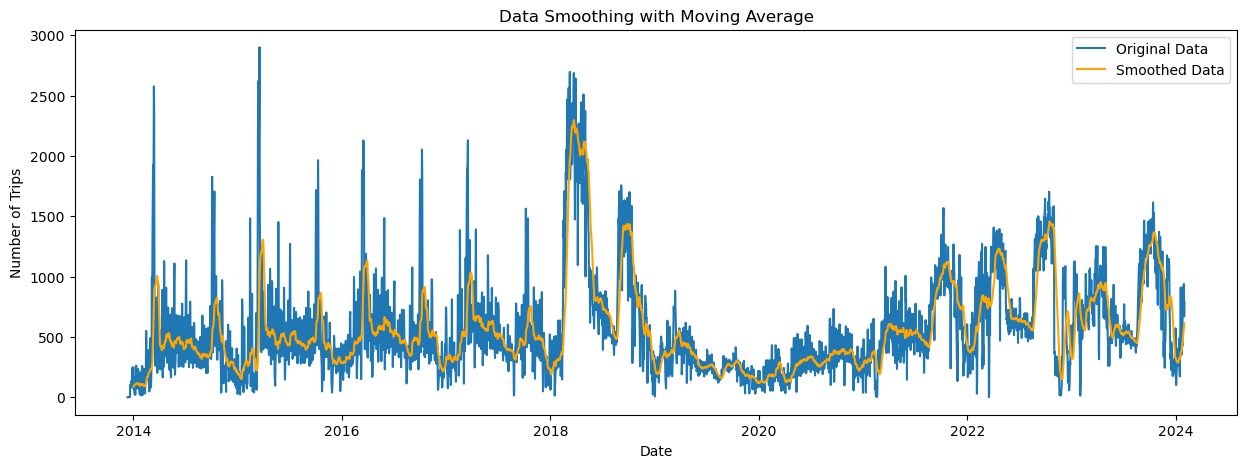

In [45]:
# smooth data using moving average
plt.figure(figsize=(15,5))
plt.plot(CO_Day.index, CO_Day['Number of Trips'], label = 'Original Data')

CO_Day['smoothed'] = CO_Day['Number of Trips'].rolling(window=20).mean()

plt.plot(CO_Day.index, CO_Day['smoothed'], label = 'Smoothed Data', color = 'Orange')

plt.legend()
plt.title('Data Smoothing with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

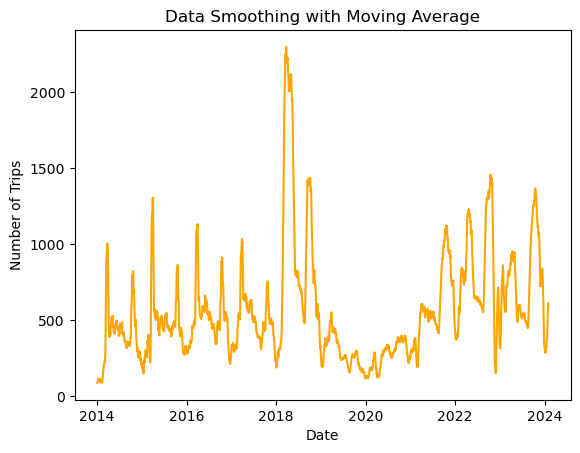

In [46]:
# plot smoothed data
plt.plot(CO_Day.index, CO_Day['smoothed'], color = 'Orange')
plt.title('Data Smoothing with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Trips')

In [75]:
# create new small table for analysis
bikes_month = bikes[['Checkout Date', 'Trip ID']]
bikes_month.head()

,Checkout Date,Trip ID
0,2017-12-01,16459203
1,2015-03-13,4106422
2,2014-10-14,3454605
3,2014-10-14,3454592
4,2015-03-13,4106421


In [77]:
# add column for date as year-month
bikes_month['Month-Year']=bikes_month['Checkout Date'].dt.to_period('M')

C:\Users\kacie\AppData\Local\Temp\ipykernel_5616\4258457530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_month['Month-Year']=bikes_month['Checkout Date'].dt.to_period('M')


In [78]:
bikes_month.head()

,Checkout Date,Trip ID,Month-Year
0,2017-12-01,16459203,2017-12
1,2015-03-13,4106422,2015-03
2,2014-10-14,3454605,2014-10
3,2014-10-14,3454592,2014-10
4,2015-03-13,4106421,2015-03


In [83]:
# create table with date and number of trips 
CO_Month = bikes_month.groupby('Month-Year')['Trip ID'].count().reset_index()
CO_Month.columns = ['Date', 'Number of Trips']
CO_Month['Date'] = CO_Month['Date'].dt.to_timestamp()
CO_Month.set_index('Date', inplace = True)
CO_Month.head()

,Number of Trips
Date,
2013-12-01,1391
2014-01-01,3201
2014-02-01,5099
2014-03-01,24020
2014-04-01,13618


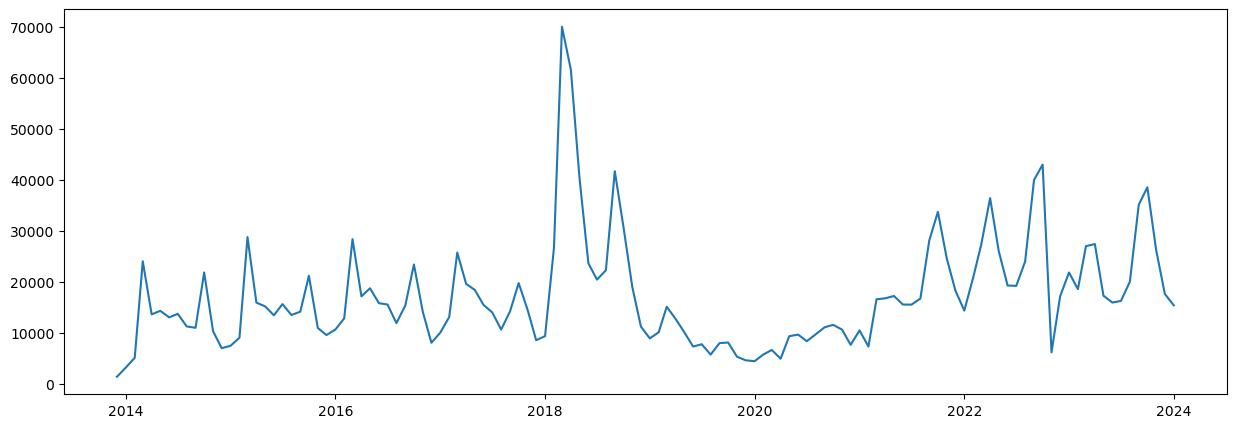

In [85]:
# plot new small table
plt.figure(figsize=(15,5))
plt.plot(CO_Month)

In [ ]:
## Will use the new small table with dates as months instead of day because the data is smoother. 

## Decomposition

<Figure size 1500x1000 with 0 Axes>

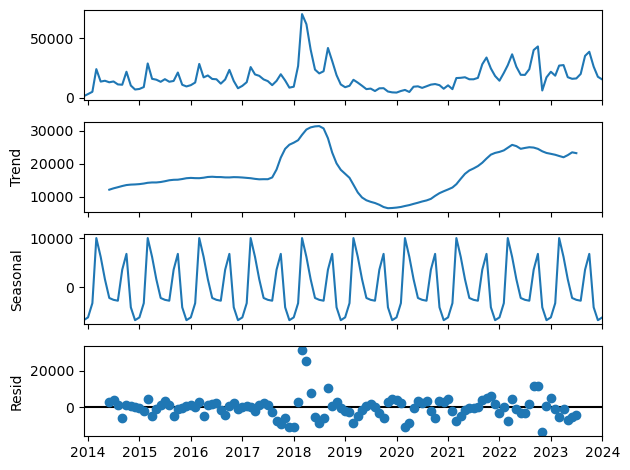

In [147]:
# Decompose the time series using an additive model, plot
CO_Month_decomp = sm.tsa.seasonal_decompose(CO_Month, model='additive')

plt.figure(figsize=(15,10))
CO_Month_decomp.plot()
plt.show()

Text(0.5, 1.0, 'Residuals from Seasonal Decomposition')

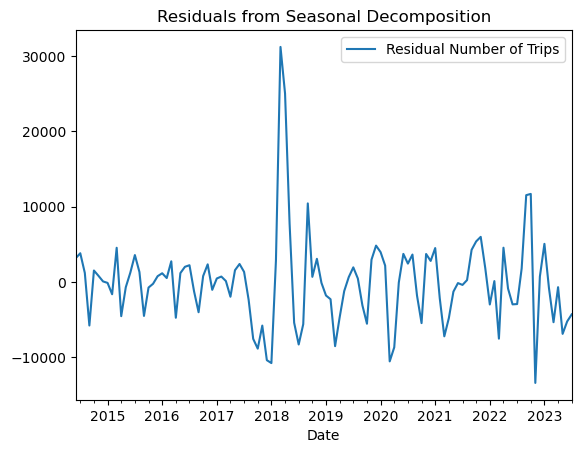

In [158]:
# plot the residuals from the decomposition
CO_Month_resid = CO_Month_decomp.resid
residual_Month = pd.DataFrame({'Residual Number of Trips': CO_Month_resid})
residual_Month.dropna(inplace = True)
residual_Month.plot()
plt.title('Residuals from Seasonal Decomposition')


## Test for Stationarity

In [157]:
# test residual data for stationarity
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(residual_Month['Residual Number of Trips'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.296144e+00
p-value                        1.376354e-10
Number of Lags Used            2.000000e+00
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [101]:
# Test original data for stationarity
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(CO_Month['Number of Trips'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.596030
p-value                          0.093821
Number of Lags Used             12.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


## Stationarize Data

Text(0, 0.5, 'Number of Trips')

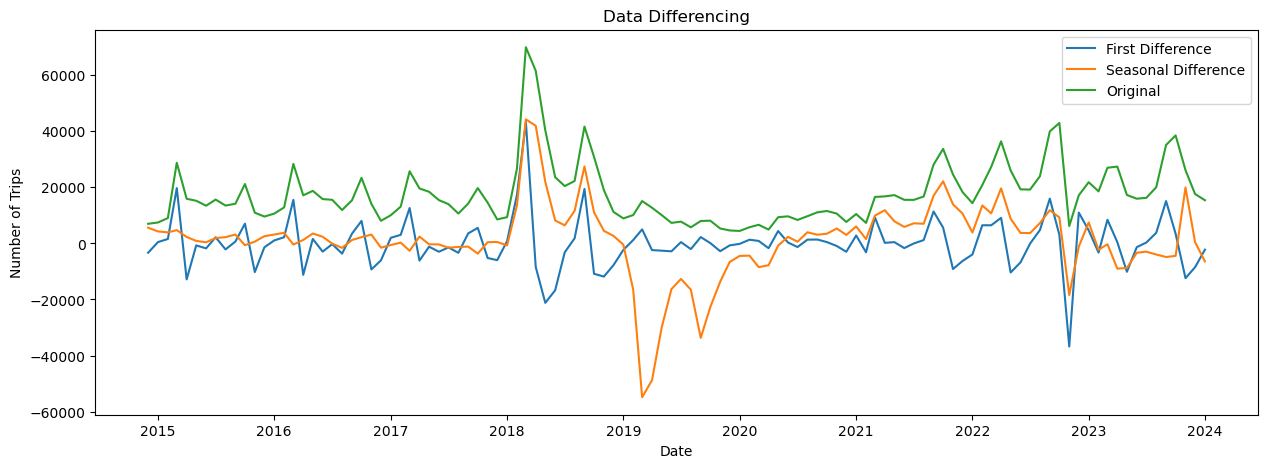

In [168]:
# First differencing
CO_Month_diff = CO_Month.copy()
CO_Month_diff['first_difference'] = CO_Month_diff['Number of Trips'].diff()

# Seasonal differencing
CO_Month_diff['seasonally_differenced'] = CO_Month_diff['Number of Trips'] - CO_Month_diff['Number of Trips'].shift(12)
CO_Month_diff.dropna(inplace = True)

# plot differencing results
plt.figure(figsize=(15,5))
plt.plot(CO_Month_diff.index, CO_Month_diff['first_difference'], label = 'First Difference')
plt.plot(CO_Month_diff.index, CO_Month_diff['seasonally_differenced'], label = 'Seasonal Difference')
plt.plot(CO_Month_diff.index, CO_Month_diff['Number of Trips'], label = 'Original')
plt.legend()
plt.title('Data Differencing')
plt.xlabel('Date')
plt.ylabel('Number of Trips')

In [164]:
# Test first difference data for stationarity
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(CO_Month_diff['first_difference'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.178548
p-value                         0.021260
Number of Lags Used            11.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [165]:
# Test seasonal difference data for stationarity
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(CO_Month_diff['seasonally_differenced'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.885092
p-value                         0.047109
Number of Lags Used            13.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


Text(0, 0.5, 'Number of Trips')

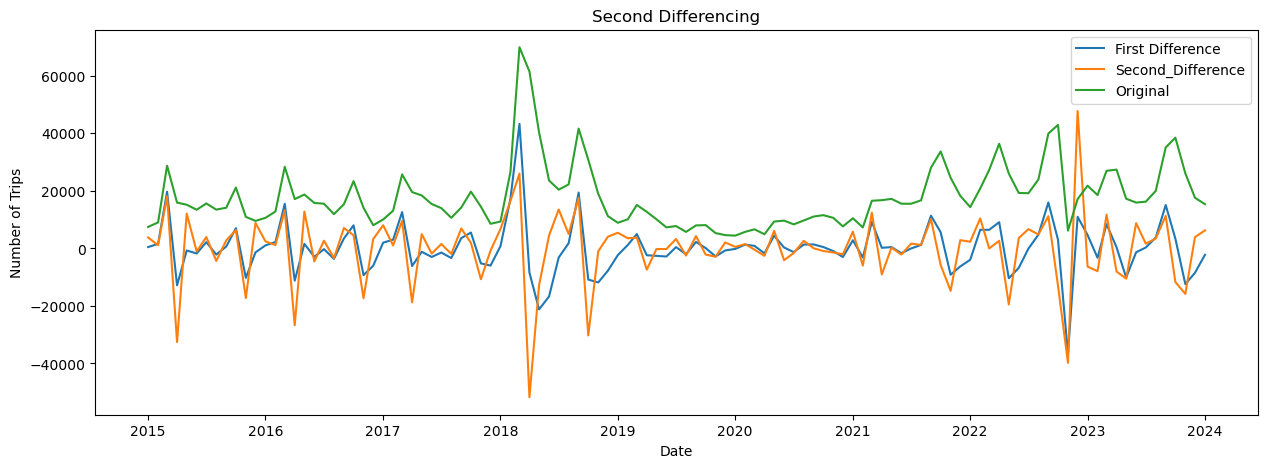

In [171]:
# plot first and second differencing with original data
CO_Month_diff['second_difference'] = CO_Month_diff['first_difference'].diff()
CO_Month_diff.dropna(inplace = True)

plt.figure(figsize=(15,5))
plt.plot(CO_Month_diff.index, CO_Month_diff['first_difference'], label = 'First Difference')
plt.plot(CO_Month_diff.index, CO_Month_diff['second_difference'], label = 'Second_Difference')
plt.plot(CO_Month_diff.index, CO_Month_diff['Number of Trips'], label = 'Original')
plt.legend()
plt.title('Second Differencing')
plt.xlabel('Date')
plt.ylabel('Number of Trips')

In [172]:
# Test second difference data for stationarity
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(CO_Month_diff['second_difference'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.399683e+00
p-value                        2.009889e-08
Number of Lags Used            1.000000e+01
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


In [187]:
CO_Month_diff.head()

,Number of Trips,first_difference,seasonally_differenced,second_difference
Date,,,,
2015-01-01,7465,472.0,4264.0,3799.0
2015-02-01,9041,1576.0,3942.0,1104.0
2015-03-01,28755,19714.0,4735.0,18138.0
2015-04-01,15919,-12836.0,2301.0,-32550.0
2015-05-01,15199,-720.0,887.0,12116.0


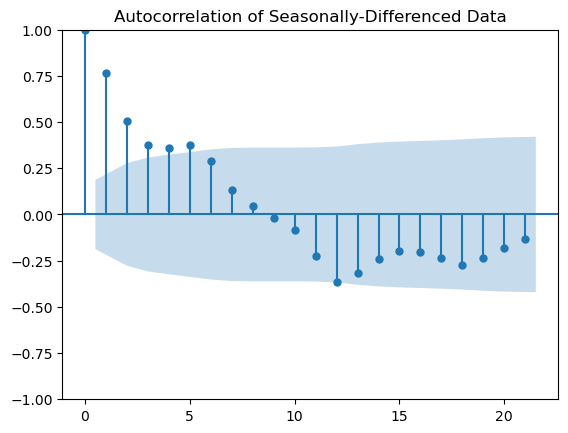

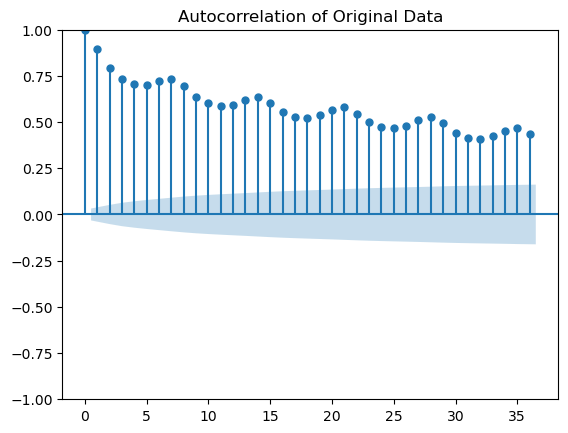

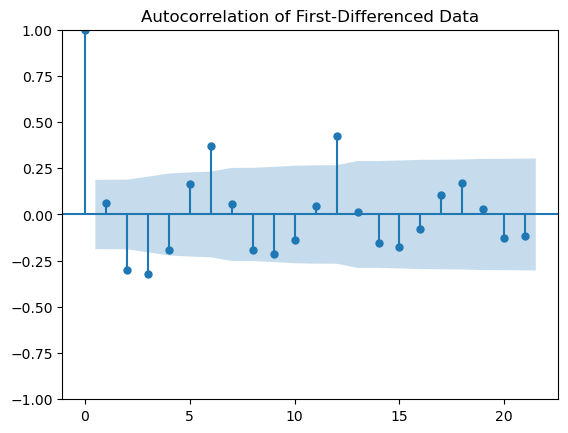

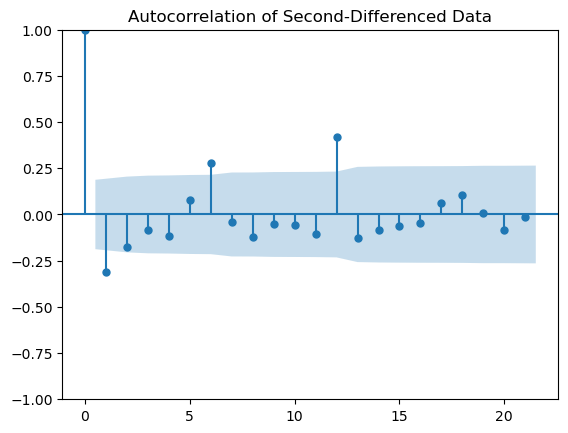

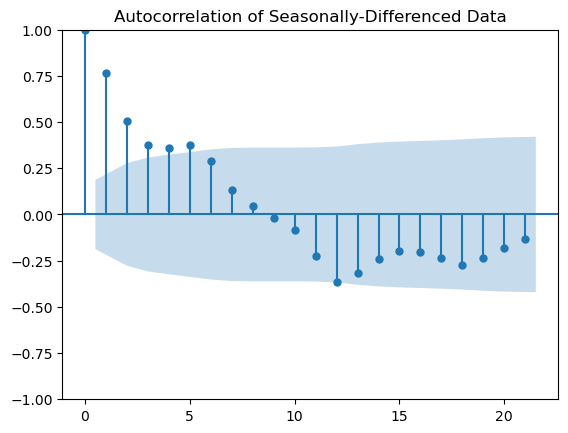

In [192]:
# test for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(CO_Day, title = 'Autocorrelation of Original Data')
plot_acf(CO_Month_diff['first_difference'], title = 'Autocorrelation of First-Differenced Data')
plot_acf(CO_Month_diff['second_difference'], title = 'Autocorrelation of Second-Differenced Data')
plot_acf(CO_Month_diff['seasonally_differenced'], title = 'Autocorrelation of Seasonally-Differenced Data')
